In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation, Dropout, LSTM, Conv1D, MaxPooling1D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# seed 설정
seed = 0

np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# 학습셋과 테스트셋 지정하기
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = 5000)

In [5]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)

In [6]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = "valid", activation="relu", strides= 1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [8]:
# 모델의 컴파일
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [9]:
# 모델의 실행
history = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), batch_size=100, epochs = 5) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.4510 - accuracy: 0.7668 - val_loss: 0.3346 - val_accuracy: 0.8522
Epoch 2/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2878 - accuracy: 0.8788 - val_loss: 0.3269 - val_accuracy: 0.8583
Epoch 3/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2470 - accuracy: 0.9009 - val_loss: 0.3329 - val_accuracy: 0.8572
Epoch 4/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2087 - accuracy: 0.9182 - val_loss: 0.3467 - val_accuracy: 0.8549
Epoch 5/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.1791 - accuracy: 0.9304 - val_loss: 0.3563 - val_accuracy: 0.8513


In [10]:
# 테스트 정확도 출력
print("\n Test Acuracy : %.4f"%(model.evaluate(x_test, Y_test)[1]))

25000/25000 [==============================] - 7s 274us/step

 Test Acuracy : 0.8513


In [11]:
# 테스트셋의 오차
y_vloss = history.history["val_loss"]

In [12]:
# 학습셋의 오차
y_loss = history.history["loss"]

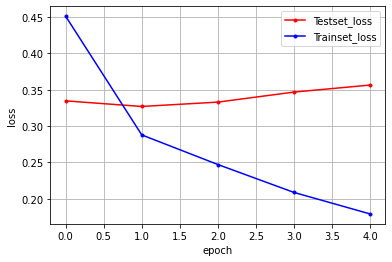

In [13]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = ".", c = "blue", label = "Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()